# <span style="font-size: 18pt; color: goldenrod; font-weight: bold">K - Nearest Neighbors</span>

## Overview:

<span style="font-size: 11pt; color: steelblue; font-weight: bold">K - Nearest Neighbors</span> is a simple yet effective **Machine Learning** algorithm used for <u>classification</u> and <u>regression</u> tasks. It's a <span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">non-parametric</span>, <span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">instance-based algorithm</span>, meaning <u>KNN doesn't make any assumptions about the underlying data distribution</u>. Instead, KNN relies on storing and comparing the training data points directly during prediction.

<span style="font-size: 11pt; color: steelblue; font-weight: bold">The idea behind KNN</span> is to find the $k$ closest data points (*neighbors*) to the query point (the data point we want to classify or predict) **based on a distance metric** (e.g., Euclidean distance, Manhattan distance, etc.). 

The class or value of the query point is then determined depending on the task at hand:

- **Classification**: by a majority vote.
- **Regression**: the average of the $k$ neighbors' values.

#### Euclidean Distance:

- Euclidean distance between two points A(x1, y1) and B(x2, y2) in a 2D space:

$$ \text{distance}(A, B) = \sqrt{(x2 - x1)^2 + (y2 - y1)^2} $$

- General formula for Euclidean distance in a multi-dimensional space (N-dimensional space):

$$ \text{distance}(A, B) = \sqrt{\sum_{i=1}^{N}(x_i - y_i)^2} $$

#### Implementation Details:

K - Nearest Neighbors is a relatively simple algorithm, and its implementation is straightforward:

1. **Load and Preprocess the Data:**
2. **Choose the Value of "k":**
   - Select a suitable value for the parameter $k$, which represents the number of nearest neighbors to consider when making predictions.
   - The value of $k$ can significantly impact the performance of the algorithm, so it's essential to experiment with different values to find the optimal one.

3. **Distance Metric:**
   - Decide on a distance metric to calculate the distance between data points.
   - The most commonly used distance metric is the Euclidean distance, but you can also explore other options like Manhattan distance or Minkowski distance.

4. **Train the Model:**
   - During training, the KNN algorithm simply stores the training data and corresponding labels in memory. There is no explicit training process like in parametric models.  
   
5. **Prediction:**

For each data point in the test set, follow these steps to make predictions:

- Calculate the distance between the data point and all data points in the training set using the chosen distance metric.
- Select the $k$ data points with the shortest distances (nearest neighbors).
- For classification tasks, use majority voting to determine the class label of the data point based on the classes of the $k$ neighbors. The class with the most votes wins.
- For regression tasks, use the average of the $k$ nearest neighbors' values as the predicted value for the data point.

6. **Evaluate the Model:**
   - Compare the predicted labels from step 6 with the actual labels from the test set.
   - Use appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) to assess the model's performance.

7. **Parameter Tuning:**
   - If necessary, repeat steps 2 to 7 with different values of $k$ and other hyperparameters to find the best combination that optimizes the model's performance.

#### Things to Notice:

1. **Choosing the right value of "k"** — <span style="font-size: 11pt; color: orange; font-weight: bold">Choosing the right value of "k" is crucial</span>. A small $k$ can make the model sensitive to noise, while a large $k$ can smooth out decision boundaries and lose local patterns. We can experiment with different values of $k$ to find the optimal one.

2. **Scale of features** — feature scaling is important for distance-based algorithms like KNN. Since KNN relies on the distance between data points, <span style="font-size: 11pt; color: orange; font-weight: bold">features with larger scales can dominate the distance calculations</span>. We should normalize or standardize our data before applying KNN.

3. **Handling ties** — In classification tasks, we might encounter cases where multiple classes have the same number of votes among the neighbors. <u>Decide on a tie-breaking strategy</u>, like choosing the class of the closest neighbor or using weighted votes based on distance.

4. **Computation cost** — KNN is <span style="font-size: 11pt; color: orange; font-weight: bold">computationally expensive during prediction</span>, especially for large datasets. The algorithm needs to calculate distances to all training points for each query point. We should consider using efficient data structures like <u>KD-trees</u> or <u>Ball trees</u> for faster nearest neighbor search.

5. **Curse of dimensionality** — KNN is sensitive to the <span style="font-size: 11pt; color: tomato; font-weight: bold">curse of dimensionality</span>, meaning it may perform poorly when dealing with high-dimensional data. As the number of dimensions increases, the distance between points tends to become similar, reducing the effectiveness of the algorithm.

6. **Class imbalance** — Imbalance in the target label in classification problems can impact KNN's performance. When one class heavily outweighs others, the majority class may dominate the predictions. We should consider techniques like <u>oversampling</u>, <u>undersampling</u>, or using <u>distance-weighted votes</u> to address this issue.

# Implementation of KNN with NumPy

In this example implementation, we will explore the k-Nearest Neighbors algorithm using the "Iris" dataset, a well-known dataset from SciKit–Learn library.

By implementing KNN with the help of the NumPy library, we can efficiently handle numerical operations and perform distance calculations on the Iris dataset.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

### Load the "Iris" dataset

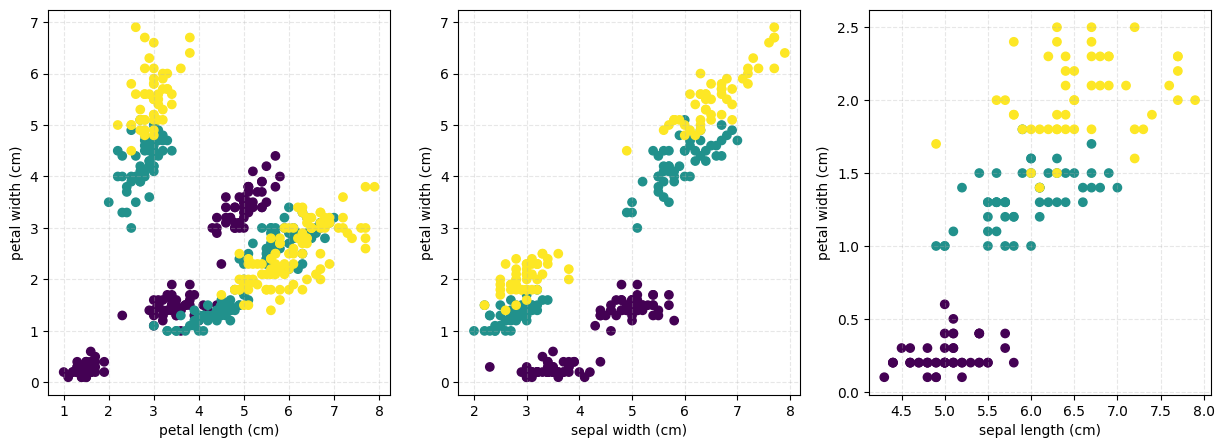

In [2]:
# Load the Iris dataset
data = datasets.load_iris()
features, target = data.data, data.target
feature_names = data['feature_names']

# Create 2D scatter plots for different feature combinations
plt.figure(figsize=(15, 5))
for i in range(4):
    for j in range(i+1, 4):
        plt.subplot(1, 3, j-i)
        # c=Y: This argument specifies the color for each data point based on the values in the Y variable 
        # (class labels). Each unique value in Y will be mapped to a specific color in the scatter plot.
        plt.scatter(features[:, i], features[:, j], c=target, cmap='viridis')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.grid(True, ls='dashed', alpha=0.3)
        
plt.show()

As we may see, there are total of 3 different classes in the "Iris" dataset.

Now we will attempt to create the KNN classifier with NumPy library which should capable of correctly predicting the labels based on the feature's data provided.

In [3]:
# split data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Create KNN classificator class

In [4]:
def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two points.

    Parameters:
    x1 (numpy array): First data point.
    x2 (numpy array): Second data point.

    Returns:
    float: Euclidean distance between x1 and x2.
    """
    return np.sqrt(np.sum((x1 - x2)**2))


class KNN():
    """
    K-Nearest Neighbors classifier.

    Parameters:
    k (int): The number of nearest neighbors to consider for classification.
    """

    def __init__(self, k):
        self.k = k

    def fit(self, features, target):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        features (numpy array): Training features.
        target (numpy array): Target labels corresponding to the training features.
        """
        self.x_train = features
        self.y_train = target

    def predict(self, X):
        """
        Predict the labels for the input data.

        Parameters:
        X (numpy array): Input data for which to make predictions.

        Returns:
        numpy array: Predicted labels for the input data.
        """
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, item):
        """
        Perform prediction for a single data point.

        Parameters:
        item (numpy array): Data point for which to make a prediction.

        Returns:
        int: Predicted label for the input data point.
        """
        # Compute the distance between the input data point and all training data points.
        distances = [euclidean_distance(item, x_train) for x_train in self.x_train]

        # Get the indices of the k-nearest neighbors.
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Perform majority vote among the k-nearest neighbors to determine the predicted label.
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


### Make inference on the test data

In [5]:
# Create a KNN classifier with k=5, 
# fit it to the training data, and make predictions on the test data
model_knn = KNN(5)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)

# Calculate the accuracy score of the KNN classifier
acc = accuracy_score(y_test, pred_knn)

# Print the accuracy score achieved
print("Accuracy score achieved:", acc)

Accuracy score achieved: 1.0


### Conclusion

The accuracy score represents the <u>proportion of correct predictions made by the classifier on the test data</u>. Specifically, it is calculated by dividing the number of correctly classified data points by the total number of data points in the test set.

An accuracy score of **1** means that our implementation of KNN classifier achieved a <u>perfect classification</u> on the test data, indicating that <span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">all data points were correctly classified into their respective classes</span>.